In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from functools import reduce
#import plotly as pl
import matplotlib 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams["figure.dpi"] = 100

mag = ['B', 'V', 'I','J','H','K']; 
bands = ['M_B', 'M_V', 'M_I', 'M_J', 'M_H', 'M_K']; band = len(bands);
ap_bands = ['B_mag', 'V_mag' ,'I_mag', 'J_mag', 'H_mag', 'K_mag']
col_dot = ['b.', 'g*', 'y+', 'r*', 'c+', 'g.', 'y+', 'b+'] ; 
col_lin = ['b-', 'g-', 'y-', 'r-', 'c-', 'g-', 'y-', 'b-'] ; 
col_das = ['b--', 'g--', 'y--', 'r--', 'c--', 'g--', 'y--', 'b--']
col_ = ['b', 'g', 'y', 'r', 'c', 'g', 'y', 'b'] ; 
ls = ['BV', 'BI', 'BK', 'VI','VJ','VK','IJ', 'IH', 'IK', 'JH', 'JK', 'HK']
color_index = []
for i in range(0,6):
    for j in range(i+1,6):
        color_index.append(mag[i]+mag[j])

disg = '_g'

data_load = '../data/output/'

# function for saving plots
def save(title, img_path = '../../Latex/figures/clean/'):
    plt.savefig('%s%s.pdf'%(img_path,title))

def plot_corr(df, Y, title, s=0, f=12):
    # To visualize first row of seaborn pairplot
    plt.figure()
    sns.set_context("paper", rc={"axes.labelsize":f})
    sns.pairplot(data=df, x_vars=df.columns[::], y_vars=Y, kind = 'scatter')
    if s==1:
        save(title)
    plt.show()

def plot_pair(data_arr, title, s=0):
    plt.figure()
    g = sns.PairGrid(data_arr)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)
    if s==1:
        save(title)
    plt.show()
    plt.figure()
    sns.heatmap(data.select_dtypes(include = 'number').corr(), annot=True)
    if s==1:
        save('heat%s'%(title))
    plt.savefig()
    plt.show()
    
def regression(x, y, x_str, y_str, p = 0):
    regression_line = stats.linregress(x, y); 
    m = regression_line.slope; 
    c = regression_line.intercept
    prediction = m * x + c; 
    residue = y-prediction 
    m_error = regression_line.stderr; 
    c_error = regression_line.intercept_stderr
    if p == 1:
        print('%s = %f %s ( %f) + %f ( %f)'%(y_str, m, x_str, m_error, c, c_error))
    return m, c, prediction, residue, m_error, c_error

def plot(x_data, y_data, x_axis_str, y_axis_str, index=0, y_invert_flag_1=0, s=0):
    slope, intercept, prediction, residue, slope_error, intercept_error = regression(x_data, y_data, x_axis_str, y_axis_str)
#    intercept, slope, prediction, residue, slope_error, intercept_error = regression(x_data, y_data, nil1, nil2, x_name, y_name)
    fig, [ax1, ax2] = plt.subplots(figsize=(7,6), nrows=2, ncols = 1, sharex=True, gridspec_kw={'height_ratios':[2,1]})
    ax1.scatter(x_data, y_data , c = raw['EBV'])
    ax1.plot(x_data, prediction , col_lin[index], label = '%s = %f ($\pm$ %f) %s + %f ($\pm$ %f)'%(y_axis_str, slope, slope_error, x_axis_str, intercept, intercept_error))
    ax1.plot(x_data, prediction - y_data.std(), col_das[index], label = ' $\sigma$ = %f'%(y_data.std()))
    ax1.plot(x_data, prediction + y_data.std(), col_das[index]) # line of standard deviation
    ax1.set_xlabel('$\Delta$' + x_axis_str);    ax1.set_ylabel('$\Delta$' + y_axis_str);							
    ax1.legend(loc='upper left')
    if y_invert_flag_1 == 1:                                    # if flag value given in input, then only invert y-axis
        ax1.invert_yaxis()
    ax2.scatter(x_data, residue, label = 'slope $%s$: %f'%(bands[index], slope), c = raw['EBV']);  	
    ax2.legend()
    ax2.set_xlabel('$\Delta$' + x_axis_str); ax2.set_ylabel('Deviation from model line')
    ax2.axhline(y=0, color='r', linestyle='--'); ax2.axvline(x=0, color='r', linestyle='--'); 		
    if s==1:
        save(y_axis_str + x_axis_str)
    plt.show()
    return slope, intercept, prediction, residue, slope_error, intercept_error

In [2]:
#-------------------------------------------------------#
#                     Extinction                        #
#-------------------------------------------------------#
                                                        #Adopting extinction values from Foque(2007) - Table 4
Ab_v = 1.31                                             #          = A_b / A_v
Av_v = 1                                                #          = A_v / A_v
Ai_v = 0.608                                            #          = A_i / A_v
Aj_v = 0.292                                            #          = A_j / A_v
Ah_v = 0.181                                            #          = A_h / A_v
Ak_v = 0.119                                            #          = A_k / A_v
#---------------------------------------------------------------------------------#
#Ratio of total to selective absorption - driving wavelength dependent value of R #
#---------------------------------------------------------------------------------#
R_v = 3.23                                              #      R_V = A_v / E(B-V) 
R_b = Ab_v*R_v                                          #      R_B = (A_b / A_v) * (A_v / E(B-V)) 
R_i = Ai_v*R_v                                          #          = (A_i / A_v) * (A_v / E(B-V)) 
R_j = Aj_v*R_v                                          #          = (A_j / A_v) * (A_v / E(B-V)) 
R_h = Ah_v*R_v                                          #          = (A_h / A_v) * (A_v / E(B-V)) 
R_k = Ak_v*R_v                                          #          = (A_k / A_v) * (A_v / E(B-V))    

A = [Ab_v, Av_v, Ai_v, Aj_v, Ah_v, Ak_v]; 
R = [R_b, R_v, R_i, R_j, R_h, R_k]; 

print('Reddening Ratio with respect to E(B-V): \n Rb, Rv, Ri, Rj, Rh, Rk:', R)

Reddening Ratio with respect to E(B-V): 
 Rb, Rv, Ri, Rj, Rh, Rk: [4.2313, 3.23, 1.96384, 0.9431599999999999, 0.58463, 0.38437]


In [12]:
data_load = '../data/output/'
data = pd.read_csv(data_load + '1_prepared/95_true_abs_data.csv', index_col=0)#%(data_path,cepheid,mode))
raw = pd.read_csv('../data/input/95_apparent_plx.csv', index_col=0)
w = pd.read_csv(data_load + '1_prepared/95_wes_data.csv', index_col=0)#%(data_path,cepheid,mode))
cepheid = len(raw)

PLW = pd.read_csv('%s%s_5_regression.csv'%(data_load+'2_PLPW/',cepheid), index_col=0)
prediction = pd.read_csv('%s%s_prediction.csv'%(data_load+'2_PLPW/',cepheid), index_col=0)
residue = pd.read_csv('%s%s_residue.csv'%(data_load+'2_PLPW/',cepheid), index_col=0)

del_mc = pd.read_csv('%s%i_del_slope_intercept.csv'%(data_load+'3_deldel/',cepheid), index_col=0)
dres = pd.read_csv('%s%i_del_res.csv'%(data_load+'3_deldel/',cepheid), index_col=0)
dpre = pd.read_csv('%s%i_del_pre.csv'%(data_load+'3_deldel/',cepheid), index_col=0)


In [21]:
residue.style#.drop('name', axis=1)

,name,logP,EBV,r_B_g,r_V_g,r_I_g,r_J_g,r_H_g,r_K_g,r_B0_g,r_V0_g,r_I0_g,r_J0_g,r_H0_g,r_K0_g,r_BBV_g,r_VBV_g,r_IBV_g,r_JBV_g,r_HBV_g,r_KBV_g,r_BVI_g,r_VVI_g,r_IVI_g,r_JVI_g,r_HVI_g,r_KVI_g,r_BVK_g,r_VVK_g,r_IVK_g,r_JVK_g,r_HVK_g,r_KVK_g,r_BJK_g,r_VJK_g,r_IJK_g,r_JJK_g,r_HJK_g,r_KJK_g
0,V0465Mon,0.433514,0.244000,-1.547738,-1.225900,-0.990247,-0.850496,-0.796668,-0.760359,-0.834462,-0.681414,-0.659200,-0.691506,-0.698117,-0.695565,-0.187710,-0.187710,-0.359028,-0.547345,-0.608756,-0.636814,-0.760226,-0.624745,-0.624745,-0.674959,-0.687859,-0.688821,-0.855504,-0.697476,-0.668966,-0.696196,-0.701024,-0.697476,-0.865195,-0.704874,-0.673464,-0.698357,-0.702363,-0.698357
1,EVSct,0.490098,0.655000,0.558024,0.358183,-0.001307,-0.160411,-0.190008,-0.220992,-0.432034,-0.397587,-0.460814,-0.381096,-0.326803,-0.310928,-0.286465,-0.286465,-0.393252,-0.348648,-0.306690,-0.297705,-0.643332,-0.558882,-0.558882,-0.428194,-0.355997,-0.330122,-0.303178,-0.299223,-0.401009,-0.352374,-0.308999,-0.299223,0.099292,0.008006,-0.214214,-0.262663,-0.253390,-0.262663
2,SZTau,0.498166,0.295000,-1.049669,-0.938044,-0.781561,-0.668651,-0.616740,-0.604052,-0.511364,-0.527124,-0.531722,-0.548662,-0.542364,-0.555153,-0.577963,-0.577963,-0.562632,-0.563507,-0.551566,-0.561203,-0.526729,-0.538853,-0.538853,-0.552087,-0.544487,-0.556549,-0.553041,-0.558939,-0.551065,-0.557952,-0.548122,-0.558939,-0.560514,-0.564643,-0.554533,-0.559618,-0.549155,-0.559618
3,SSSct,0.564814,0.325000,-0.324275,-0.283759,-0.208464,-0.094648,-0.061281,-0.035049,0.129176,0.062387,0.001993,0.006427,0.001371,0.006142,-0.153062,-0.153062,-0.129000,-0.056484,-0.037625,-0.019497,-0.072650,-0.091679,-0.091679,-0.038560,-0.026515,-0.012192,0.045543,-0.001455,-0.036823,-0.012215,-0.010184,-0.001455,0.127019,0.060740,0.000992,0.005946,0.001073,0.005946
4,QZNor,0.578244,0.263000,-1.068363,-0.960414,-0.759506,-0.655672,-0.578796,-0.573447,-0.344092,-0.407535,-0.423356,-0.494231,-0.478725,-0.507654,-0.612189,-0.612189,-0.547786,-0.553991,-0.515767,-0.532008,-0.396964,-0.447895,-0.447895,-0.506017,-0.486030,-0.512457,-0.492964,-0.521177,-0.492451,-0.527415,-0.499294,-0.521177,-0.445731,-0.485122,-0.470529,-0.516887,-0.492768,-0.516887
5,ADGem,0.578408,0.173000,-0.797936,-0.494895,-0.105907,0.214988,0.314895,0.364258,0.307256,0.348763,0.407037,0.461336,0.467597,0.464653,0.482654,0.482654,0.488443,0.500433,0.491832,0.480587,0.501999,0.497421,0.497421,0.504745,0.494505,0.482344,0.479580,0.480307,0.487016,0.499747,0.491407,0.480307,0.332373,0.367936,0.418694,0.466935,0.471068,0.466935
6,YAur,0.586529,0.375000,-0.081482,0.020054,0.186040,0.193970,0.216395,0.219434,0.174116,0.215167,0.304669,0.250943,0.251711,0.242652,0.347588,0.347588,0.385181,0.289610,0.275679,0.258410,0.473217,0.443488,0.443488,0.317613,0.293037,0.269822,0.214985,0.246365,0.323637,0.260053,0.257357,0.246365,0.111331,0.167239,0.275529,0.236949,0.243036,0.236949
7,STTau,0.605768,0.368000,-0.440276,-0.277092,-0.139634,-0.082514,-0.051494,-0.039855,-0.142911,-0.050095,-0.001620,-0.016231,-0.010407,-0.012842,0.249311,0.249311,0.180419,0.071196,0.043785,0.022787,0.019086,0.073567,0.073567,0.019878,0.011976,0.001873,-0.087518,-0.007810,0.024089,-0.003884,-0.002754,-0.007810,-0.117251,-0.030507,0.010290,-0.010511,-0.006862,-0.010511
8,BFOph,0.609329,0.235000,-0.725457,-0.576301,-0.327090,-0.147639,-0.077954,-0.063019,0.136920,0.082002,0.073158,0.044585,0.041199,0.015319,-0.095153,-0.095153,-0.034552,-0.007144,0.009134,-0.005762,0.107367,0.059442,0.059442,0.037998,0.037116,0.012635,0.037767,0.006312,0.027139,0.022484,0.027499,0.006312,-0.084686,-0.087163,-0.029694,-0.004811,0.010580,-0.004811
9,SYCas,0.609712,0.442000,-0.188222,-0.152855,-0.053455,-0.051861,-0.027104,-0.010137,-0.201483,-0.162977,-0.059609,-0.054817,-0.028936,-0.011342,-0.038765,-0.038765,0.015912,-0.018547,-0.006454,0.003440,0.143956,0.100716,0.100716,0.022181,0.018792,0.020038,0.023991,0.009140,0.045038,-0.004559,0.002217,0.009140,0.127724,0.088326,0.093183,0.018563,0.016550,

In [ ]:
cols=['BV','VI', 'VK', 'JK']

In [23]:
m = {}
me = {}
for c in cols:
    m[c] = del_mc[[f'{mag[i]*2}{c}' for i in range(6)]].iloc[0]
#    c = del_mc[[f'{mag[i]*2}{c}' for i in range(6)]].iloc[1]
    me[c] = del_mc[[f'{mag[i]*2}{c}' for i in range(6)]].iloc[2]
#    ce = del_mc[[f'{mag[i]*2}{c}' for i in range(6)]].iloc[3]
print('\t Band & rho^{BV}_\lambda (error) &  rho^{VI}_\lambda (error) & rho^{VK}_\lambda (error) & rho^{JK}_\lambda (error) \\\ ')
for i in range(0,6):
    print(f'\t{mag[i]} & ', round(m[cols[0]][i],7), '(', round(me[cols[0]][i],7),')', '& ', round(m[cols[1]][i],7), '(', round(me[cols[1]][i],7),')', '& ', round(m[cols[2]][i],7), '(', round(me[cols[2]][i],7),')', '& ', round(m[cols[3]][i],7), '(', round(me[cols[3]][i],7),')', '\\\ ')

	 Band & rho^{BV}_\lambda (error) &  rho^{VI}_\lambda (error) & rho^{VK}_\lambda (error) & rho^{JK}_\lambda (error) \\ 
	B &  0.5322047 ( 0.0961507 ) &  0.8191501 ( 0.0748684 ) &  1.0360473 ( 0.0797561 ) &  0.6185624 ( 0.1111986 ) \\ 
	V &  0.6429044 ( 0.0733975 ) &  0.8469927 ( 0.0597195 ) &  1.0157031 ( 0.0623038 ) &  0.7784021 ( 0.0952172 ) \\ 
	I &  0.8379168 ( 0.0507169 ) &  0.9069716 ( 0.0363095 ) &  1.0179528 ( 0.0363757 ) &  0.9926925 ( 0.0598421 ) \\ 
	J &  0.9635126 ( 0.027843 ) &  0.9762111 ( 0.0194396 ) &  1.0098355 ( 0.0176429 ) &  1.0369119 ( 0.0282467 ) \\ 
	H &  0.9807535 ( 0.0180091 ) &  0.9842351 ( 0.0125528 ) &  1.0023274 ( 0.0112641 ) &  1.0227927 ( 0.0176964 ) \\ 
	K &  0.9934043 ( 0.0120025 ) &  0.991875 ( 0.0083515 ) &  1.0018687 ( 0.0074142 ) &  1.0150429 ( 0.0115115 ) \\ 


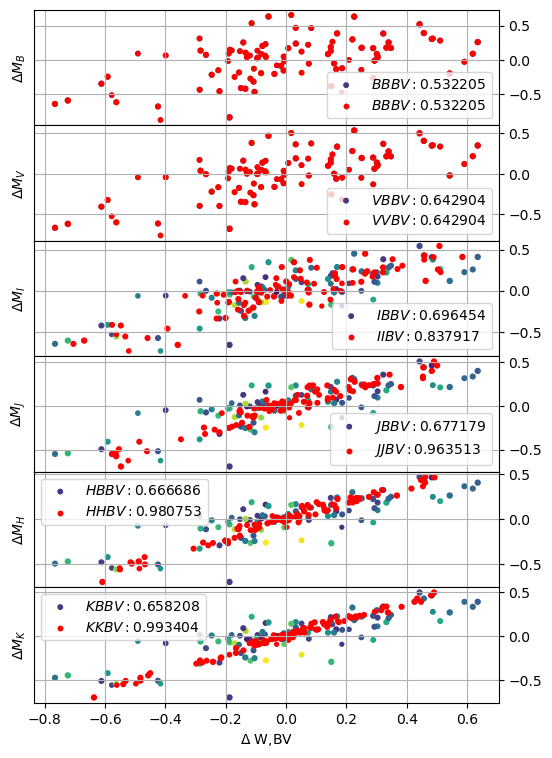

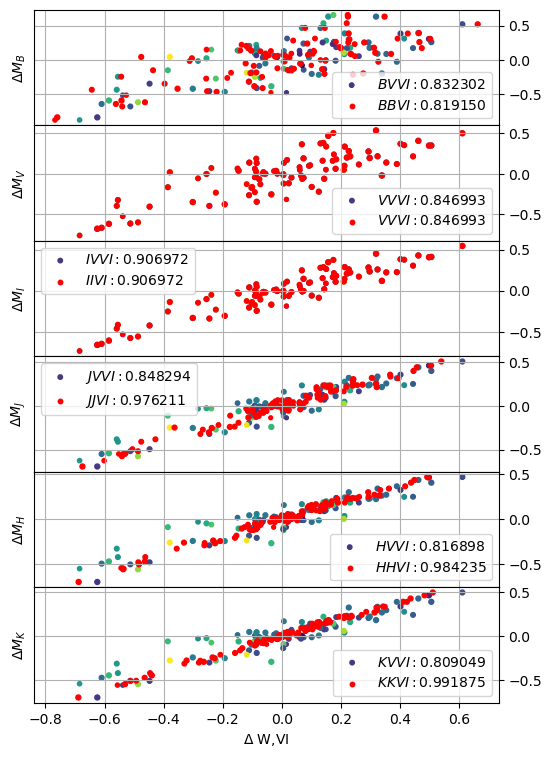

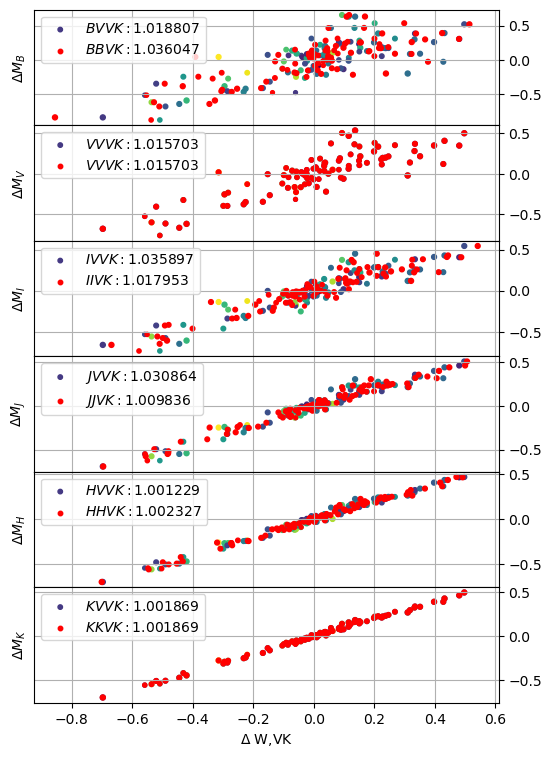

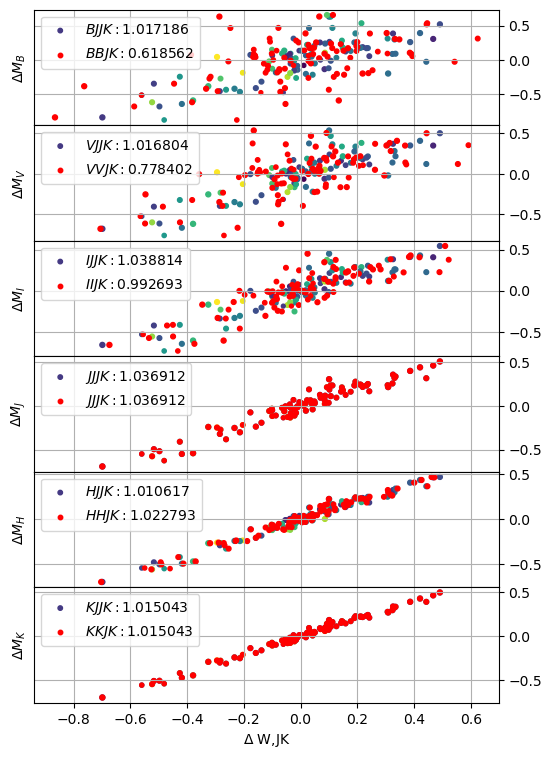

In [22]:
def del_del_plot(x,s=0):
    fig, axarr = plt.subplots(6, sharex='col',gridspec_kw={'hspace': 0, 'wspace': 0})
    fig = plt.gcf()
    fig.set_size_inches(6, 9)
    XM = residue['r_'+x[0]+x]
    for i,ax in enumerate(axarr):
        XS = residue['r_'+mag[i]+x]
        Y = residue['r_'+mag[i]+'0_g']
        ax.scatter(XM, Y, label='$%s: %f$'%(mag[i]+x[0]+x[0:2],  del_mc[mag[i]+x[0]+x[0:2]].iloc[0]), s=data['plx'], c = data['EBV'])
        ax.scatter(XS, Y, label='$%s: %f$'%(mag[i]*2+x[0:2],  del_mc[2*mag[i]+x[0:2]].iloc[0]), s=data['plx'], c = 'r')
        ax.yaxis.tick_right()
        ax.set_ylabel('$\Delta M_%s$'%(mag[i]))
        ax.legend()
        ax.grid()
    #        ax.annotate('%s: %f'%(wesen, c.m.iloc[i]), xy =(-1.5, -0.4)) 
    ax.set_xlabel('$\Delta$ W,%s'%(x[:2])) 
#    plt.gca().invert_xaxis()
    title = 'del_del' 
    if s==1:
        save(title+x)
    plt.show()

cols = ['BV', 'VI', 'VK', 'JK']
for c in cols:
    del_del_plot(f'{c}_g', s=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


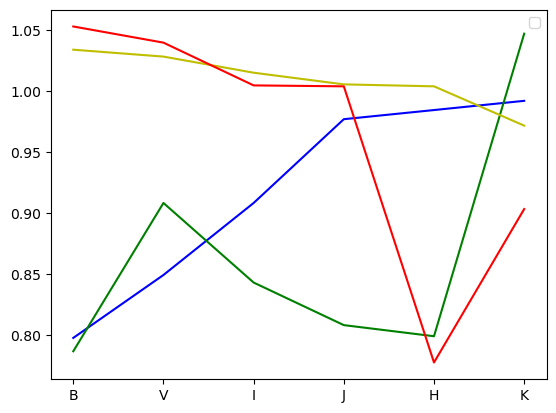

In [124]:
for i in range(0,24,6):
    plt.plot([j for j in range(0,6)],del_mc.T.mg[i:i+6], col_lin[int(i/6)])
    ticks = ['B', 'V', 'I', 'J', 'H', 'K']
    plt.xticks([0,1,2,3,4,5],ticks)
    plt.legend()

NameError: name 'dmc' is not defined

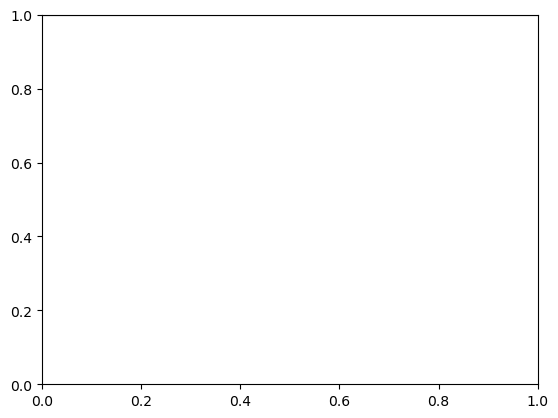

In [126]:
# Slope comparison of del-del plot

for i in range(0,12,2):
    plt.axhline(y=1, color='k', linestyle='-'); 
    plt.plot([j for j in range(0,6)],dmc[i].m, col_lin[int(i/2)])
    plt.plot([j for j in range(0,6)],dmc[i+1].m, col_das[int(i/2)], label = '$W_{%s}$'%dmc[i].columns[0])
    plt.legend()
plt.show()
for i in range(12,24,2):
    plt.axhline(y=1, color='k', linestyle='-'); 
    plt.plot([j for j in range(0,6)],dmc[i].m, col_lin[int(i/2)-6])
    plt.plot([j for j in range(0,6)],dmc[i+1].m, col_das[int(i/2)-6], label = '$W_{%s}$'%dmc[i].columns[0])
    plt.legend()

B = 0.942241 BVI ( 0.049062) + 0.000000 ( 0.021998)


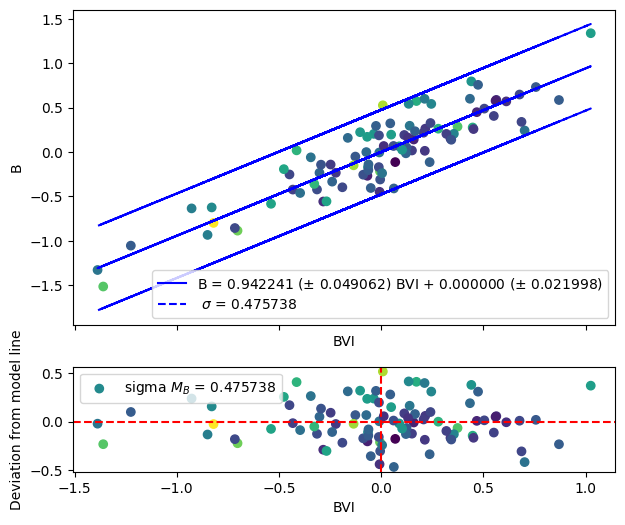

(0.9422412043193481,
 4.0648342519277876e-17,
 0    -0.781275
 1    -0.407253
 2    -0.422615
 3     0.203514
 4    -0.063375
         ...   
 91    0.201318
 92   -0.225882
 93   -0.058422
 94   -0.772788
 95   -0.507685
 Name: r_BVI, Length: 96, dtype: float64,
 0     0.157766
 1    -0.015193
 2     0.170698
 3     0.060201
 4    -0.203773
         ...   
 91   -0.187025
 92   -0.107003
 93   -0.079813
 94   -0.024879
 95   -0.074849
 Length: 96, dtype: float64,
 0.049062175397943907,
 0.021997937234778206)

In [ ]:
color = 'VI'
i=0
plot(residue['r_'+mag[i]+color], residue['r_'+bands[i]], mag[i]+color, mag[i], i)

B = 0.743589 BBV ( 0.075981) + -0.000000 ( 0.034354)


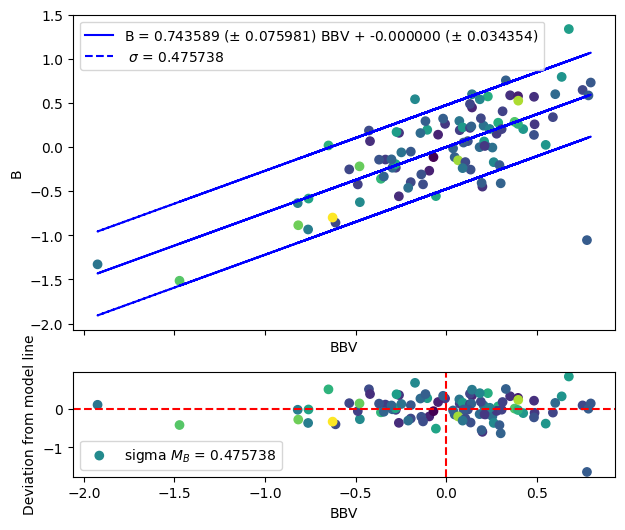

V = 0.804267 VBV ( 0.058001) + -0.000000 ( 0.026224)


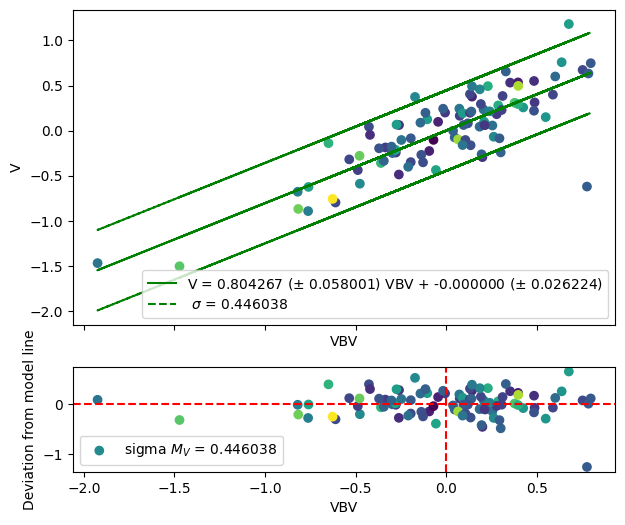

I = 0.930135 IBV ( 0.038532) + -0.000000 ( 0.016595)


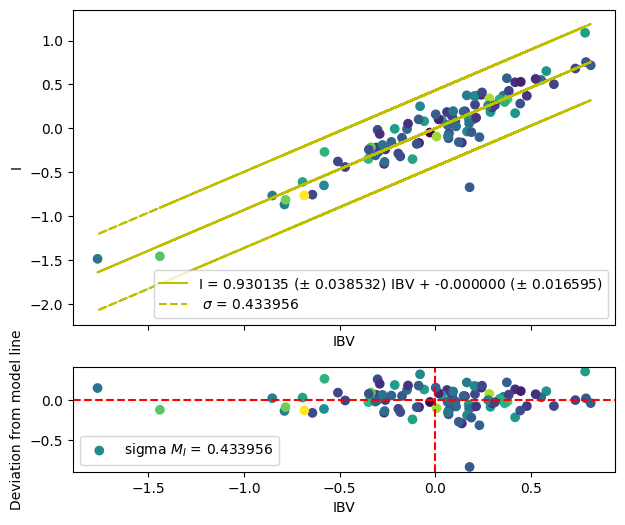

J = 0.994563 JBV ( 0.019426) + -0.000000 ( 0.008105)


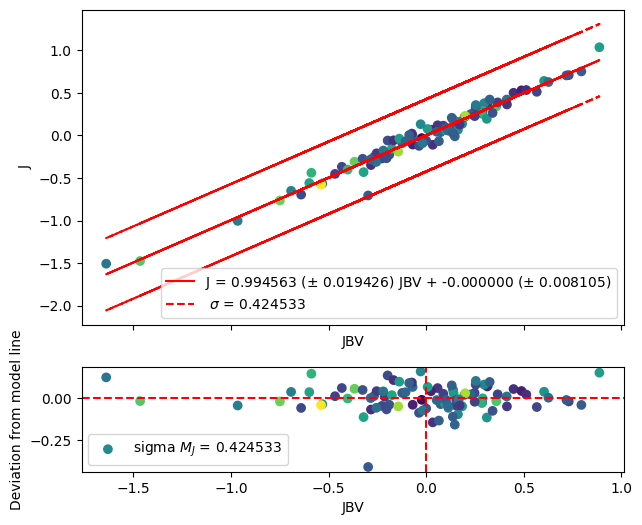

H = 1.000775 HBV ( 0.012194) + 0.000000 ( 0.005026)


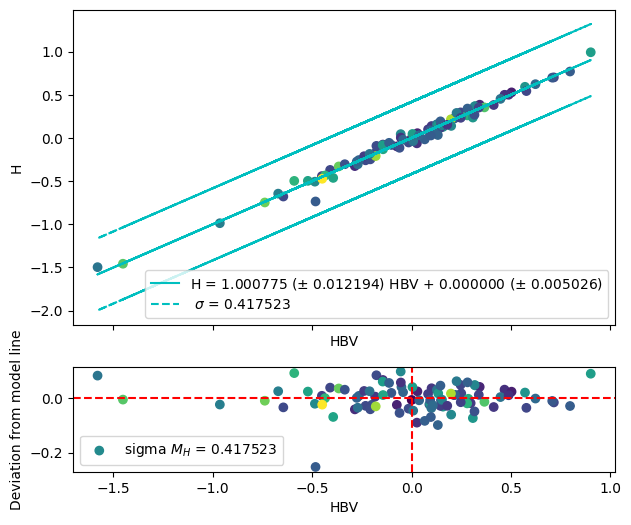

K = 1.003577 KBV ( 0.008039) + 0.000000 ( 0.003301)


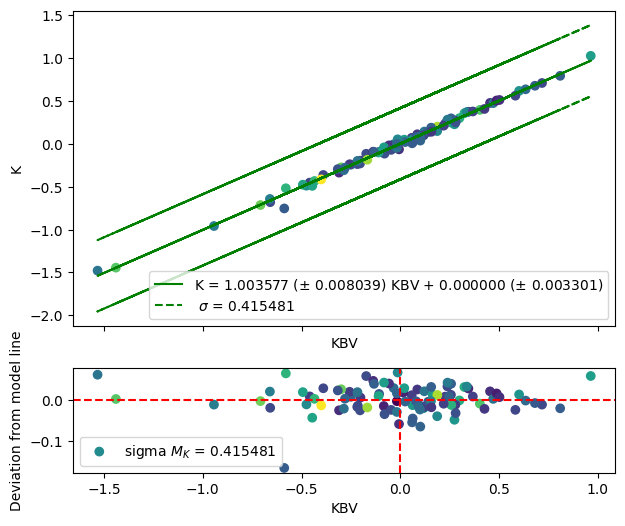

B = 0.952904 BBI ( 0.058920) + 0.000000 ( 0.025098)


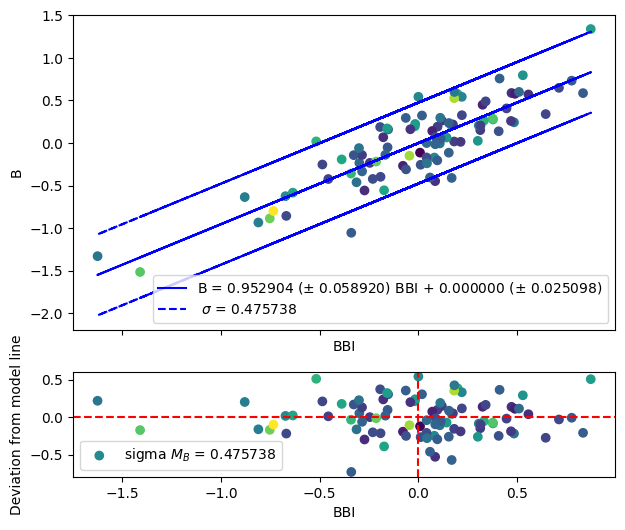

V = 0.945271 VBI ( 0.044697) + -0.000000 ( 0.019072)


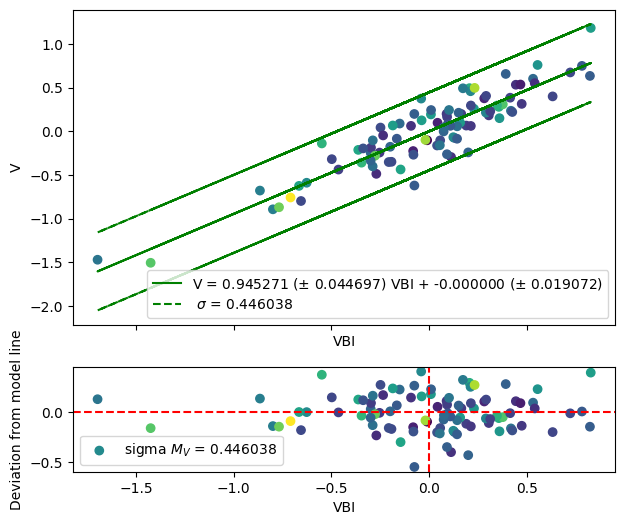

I = 0.978142 IBI ( 0.027346) + 0.000000 ( 0.011648)


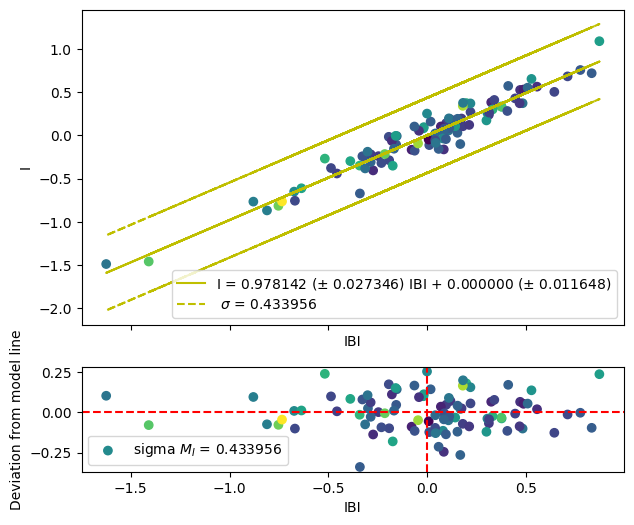

J = 1.001862 JBI ( 0.013427) + -0.000000 ( 0.005613)


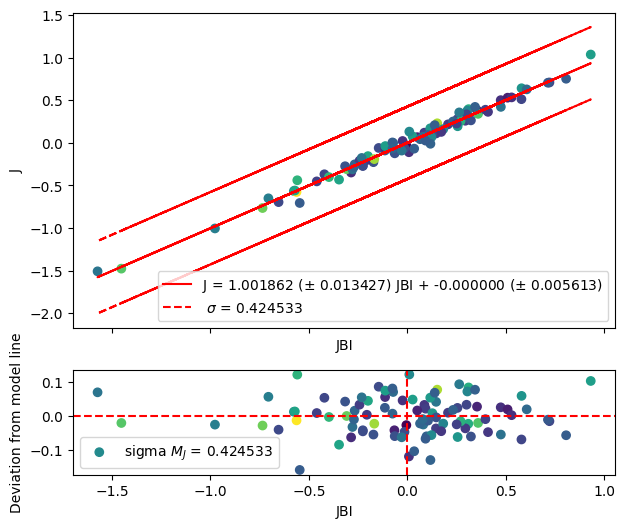

H = 1.001635 HBI ( 0.008417) + 0.000000 ( 0.003479)


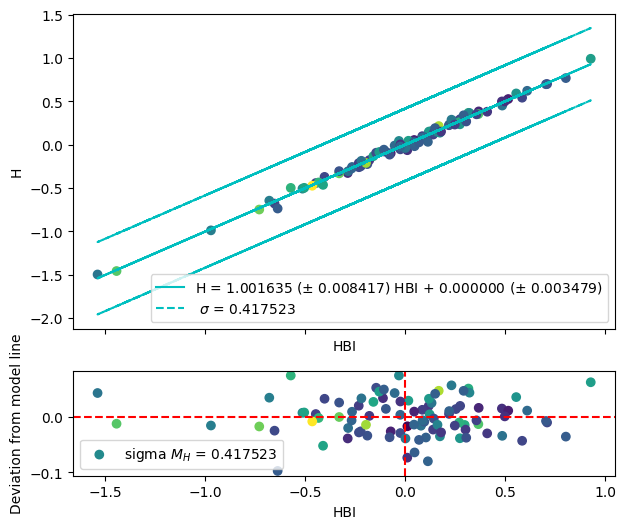

K = 1.002353 KBI ( 0.005551) + 0.000000 ( 0.002285)


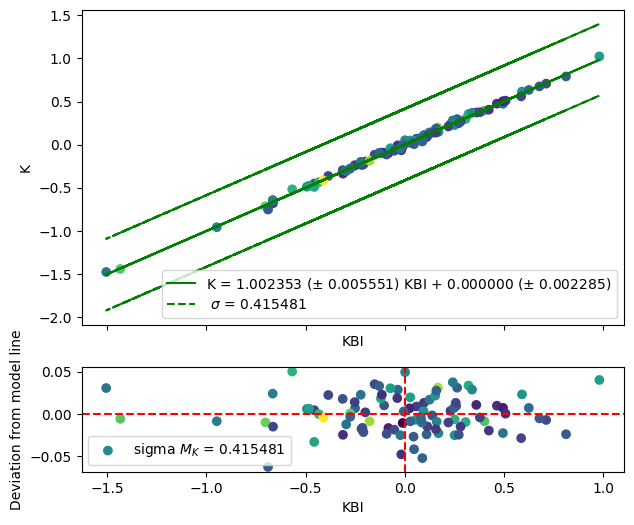

B = 0.942241 BVI ( 0.049062) + 0.000000 ( 0.021998)


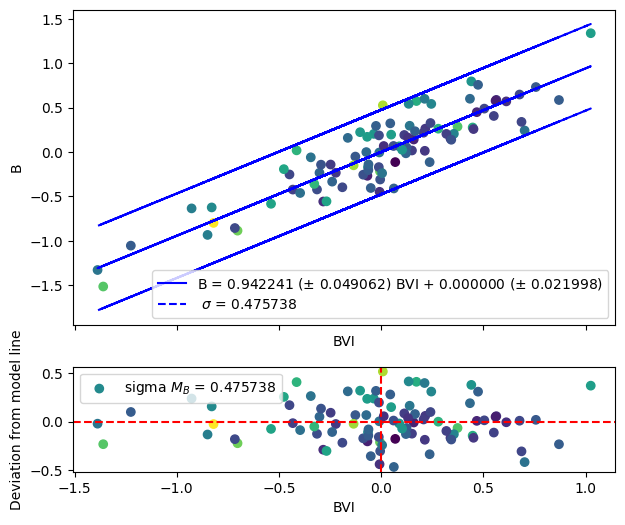

V = 0.955978 VVI ( 0.038917) + 0.000000 ( 0.016802)


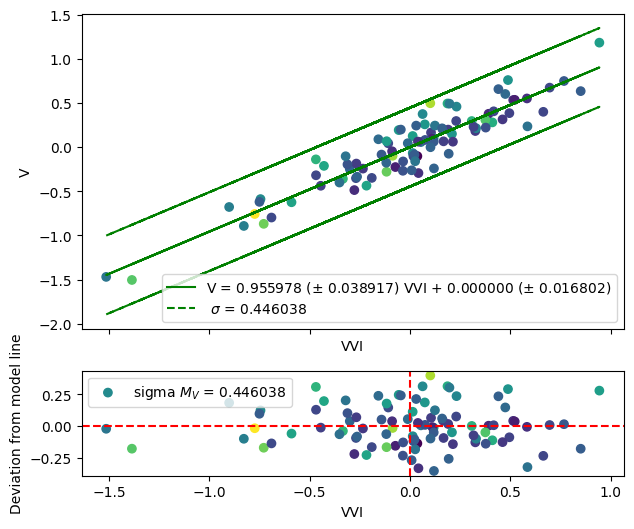

I = 0.973235 IVI ( 0.023662) + 0.000000 ( 0.010215)


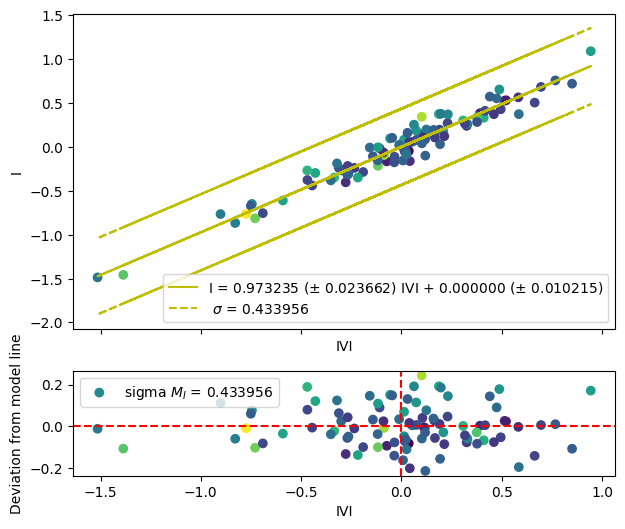

J = 0.996924 JVI ( 0.011731) + 0.000000 ( 0.004938)


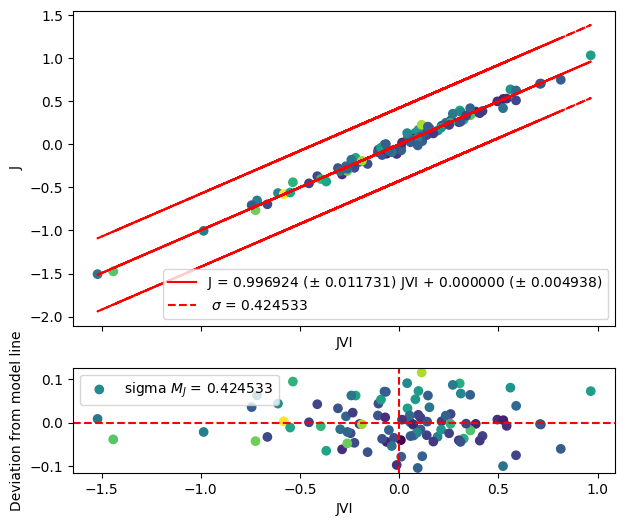

H = 0.998114 HVI ( 0.007374) + 0.000000 ( 0.003061)


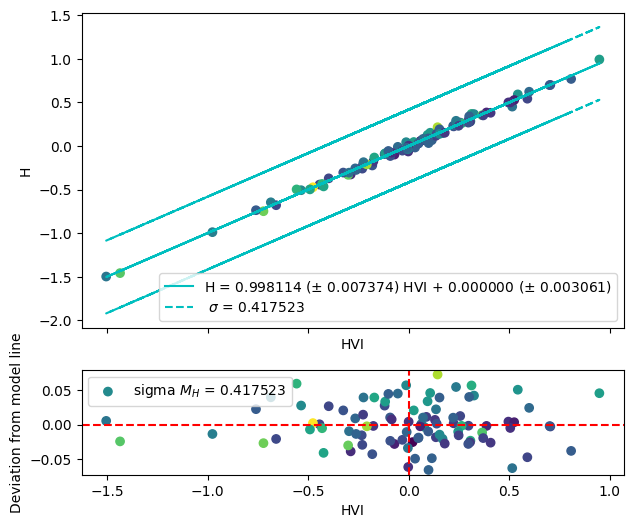

K = 0.999565 KVI ( 0.004873) + 0.000000 ( 0.002013)


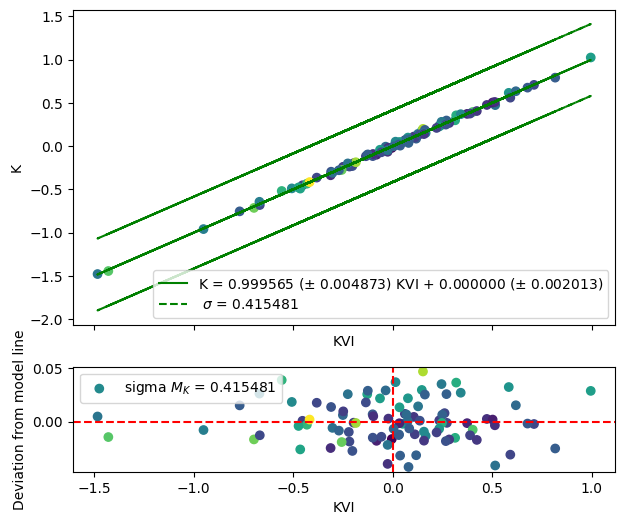

B = 1.013762 BVK ( 0.047594) + 0.000000 ( 0.020222)


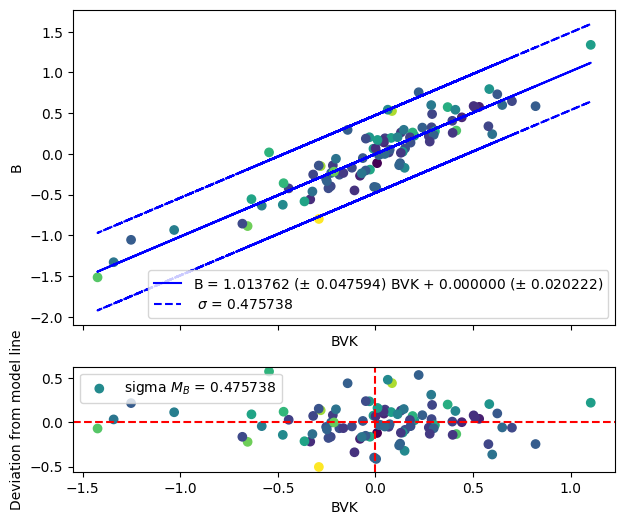

V = 1.013188 VVK ( 0.037434) + -0.000000 ( 0.015433)


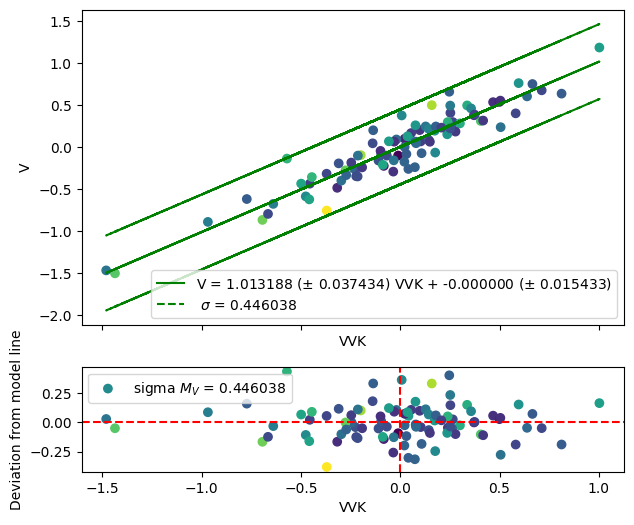

I = 1.013536 IVK ( 0.022507) + 0.000000 ( 0.009372)


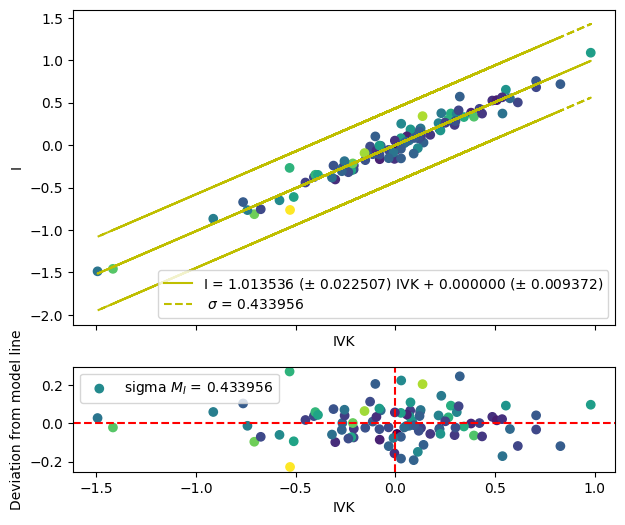

J = 1.006402 JVK ( 0.010784) + 0.000000 ( 0.004501)


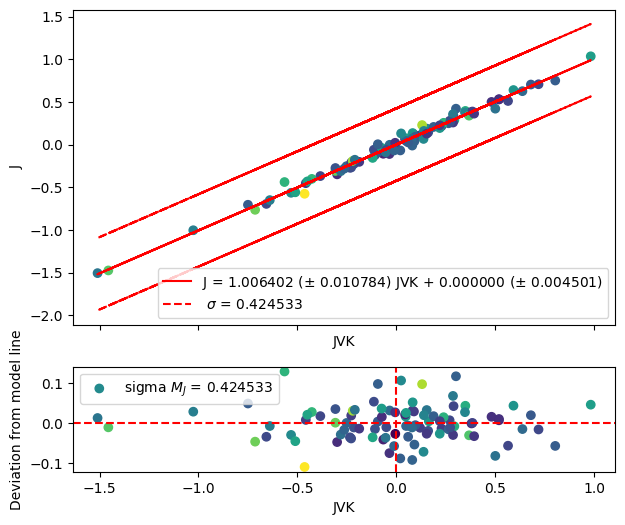

H = 1.002373 HVK ( 0.006756) + 0.000000 ( 0.002793)


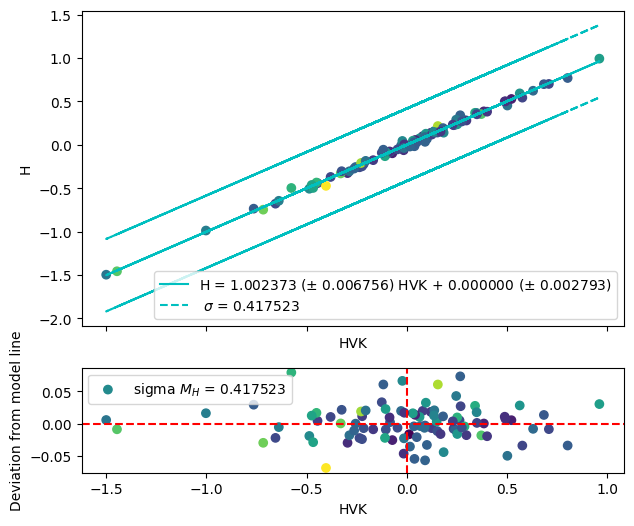

K = 1.001569 KVK ( 0.004455) + -0.000000 ( 0.001837)


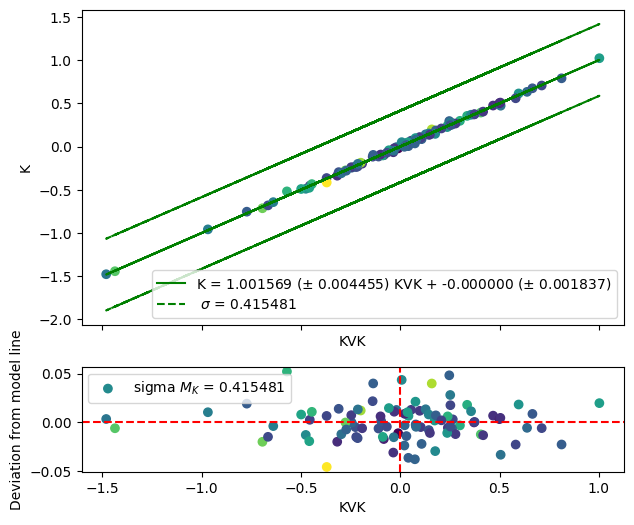

B = 0.823542 BJK ( 0.073314) + 0.000000 ( 0.031893)


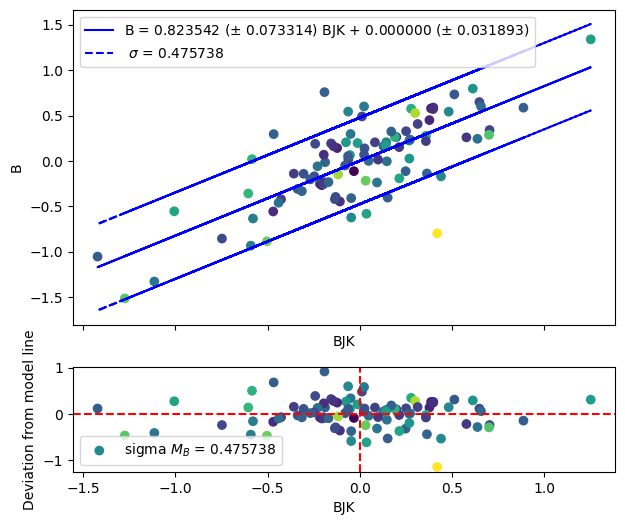

V = 0.911877 VJK ( 0.060672) + -0.000000 ( 0.024808)


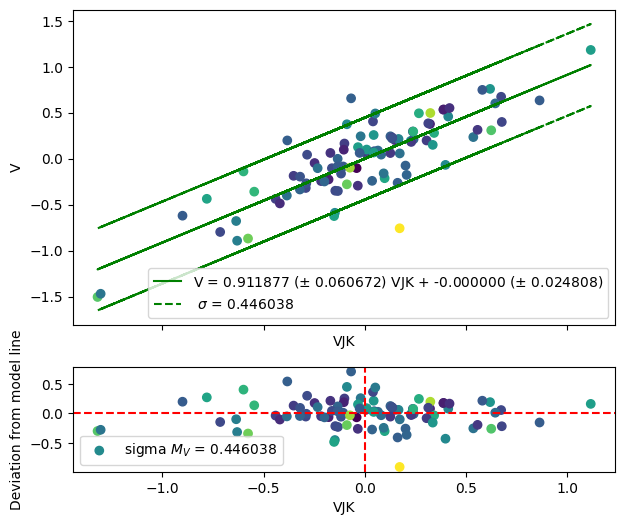

I = 1.002703 IJK ( 0.037706) + -0.000000 ( 0.015251)


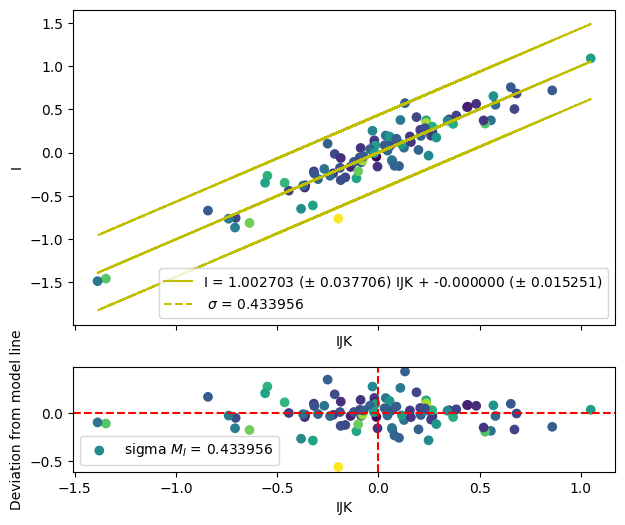

J = 1.016702 JJK ( 0.017803) + -0.000000 ( 0.007291)


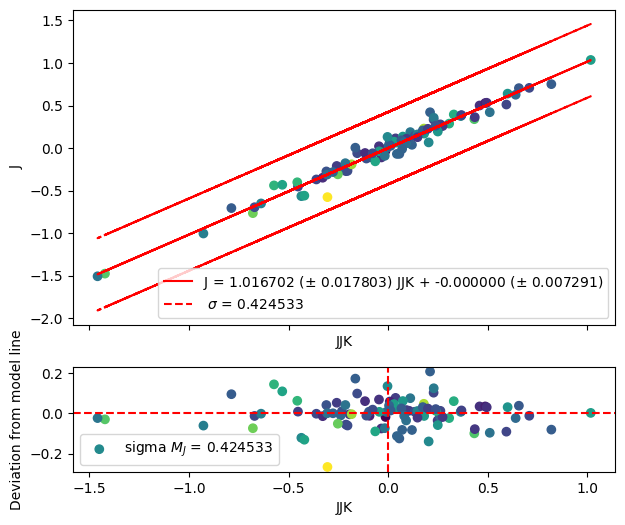

H = 1.010205 HJK ( 0.011055) + 0.000000 ( 0.004520)


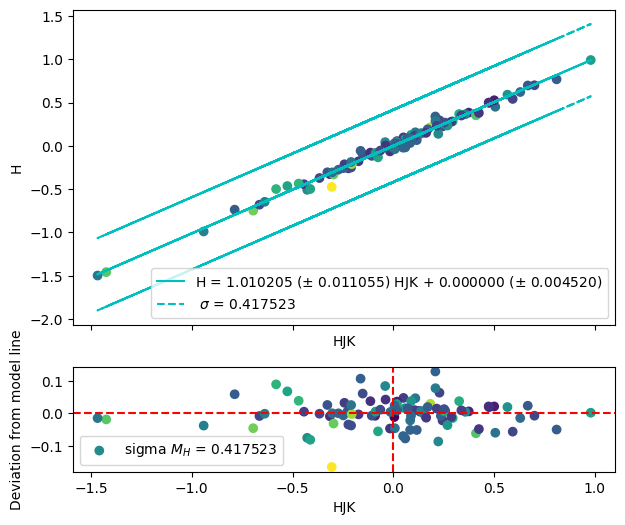

K = 1.006806 KJK ( 0.007255) + -0.000000 ( 0.002971)


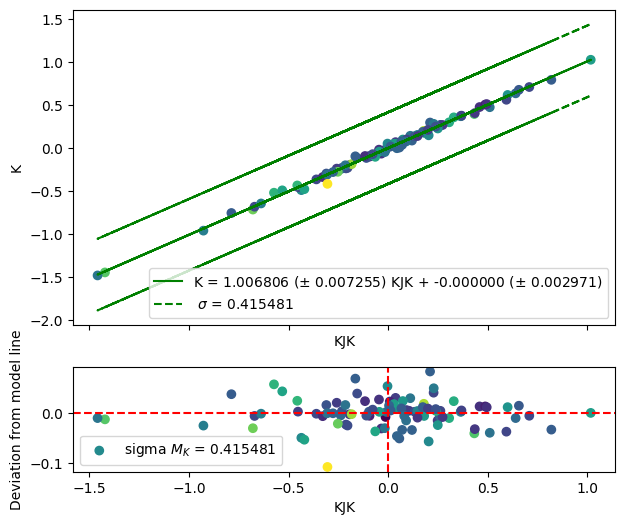

In [ ]:
for color in ['BV', 'BI', 'VI', 'VK', 'JK']:
    for i in range(0,6):
        plot(residue['r_'+mag[i]+color], residue['r_'+bands[i]], mag[i]+color, mag[i], i)